# Plot Maps of ROH sharing.
Use basemap to create nice visualizations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os  # For Saving to Folder
import pandas as pd
from scipy.stats import binned_statistic  # For Binning

import matplotlib.cm as cm
import matplotlib.colorbar as clb
import matplotlib.colors as cls
from matplotlib import gridspec

from mpl_toolkits.basemap import Basemap

import socket
import os as os
import sys as sys
import multiprocessing as mp

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


### Load Data
1. full meta_df and 
2. HO results meta

In [15]:
### Load the relevant Data
meta_path = "./Data/Marcus2019_1240k/meta_rev_unique_ids.csv"
df_meta = pd.read_csv(meta_path)
df_ho = df_meta[df_meta["study"]=="Lazaridis et al. 2014"]

### Load HAPSBURG results
ho_results_path = "./Empirical/HO/CombinedROH/combinedroh.csv"
df_roh = pd.read_csv(ho_results_path, sep='\t')

In [32]:
df_roh[df_roh["pop"]=="Karitiana"]

,iid,pop,max_roh,sum_roh,n_roh,lat,lon,age
1,Karitiana_11,Karitiana,71.722305,617.914425,37,-10.0,-63.0,0.0
24,Karitiana_6,Karitiana,45.313498,391.608298,26,-10.0,-63.0,0.0
26,Karitiana_8,Karitiana,64.847401,385.001179,25,-10.0,-63.0,0.0
38,Karitiana_10,Karitiana,82.006193,339.903583,30,-10.0,-63.0,0.0
64,Karitiana_1,Karitiana,49.881899,271.734296,23,-10.0,-63.0,0.0
67,Karitiana_9,Karitiana,22.559301,269.280127,28,-10.0,-63.0,0.0
71,Karitiana_3,Karitiana,28.113000,260.162700,21,-10.0,-63.0,0.0
86,Karitiana_4,Karitiana,28.001595,238.774982,21,-10.0,-63.0,0.0
90,Karitiana_7,Karitiana,29.875001,233.929186,22,-10.0,-63.0,0.0
146,Karitiana_0,Karitiana,21.097201,159.277600,19,-10.0,-63.0,0.0


## World Wide Plot of all HO samples

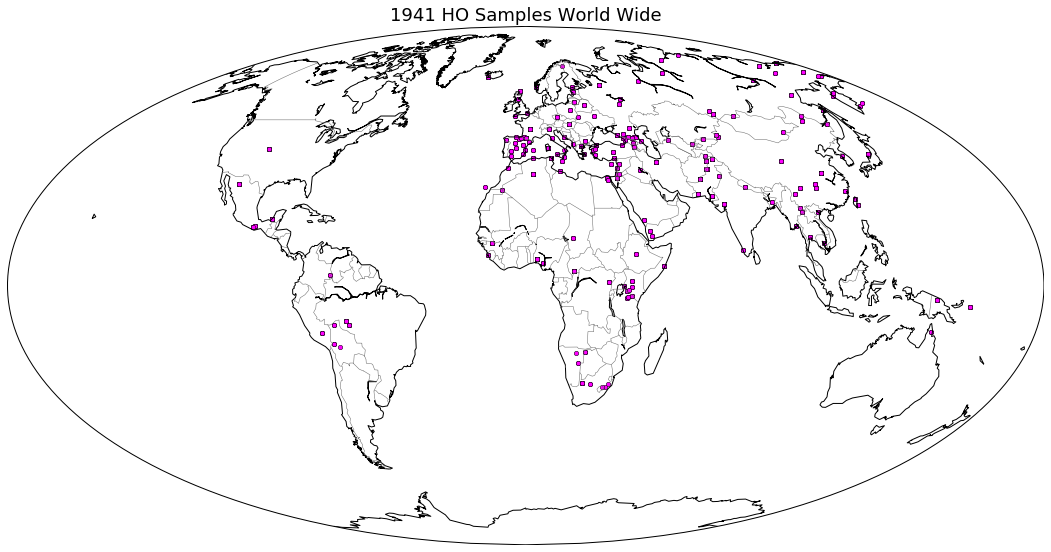

In [25]:
fs = 18
lat=df_roh["lat"].values
lon=df_roh["lon"].values

fig = plt.figure(figsize=(18,12))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

#m = Basemap(projection='cyl',llcrnrlat=-60,urcrnrlat=85, 
#                llcrnrlon=-180,urcrnrlon=180,resolution='c')

m = Basemap(projection='moll', lat_0=0, lon_0=0)

m.drawcoastlines()
#m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,1], fontsize=8)
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1], rotation=45, fontsize=8)
#m.etopo(scale=0.5, alpha=0.4)  # if topological map
m.drawcoastlines(color='gray', zorder=0)
m.drawcountries(color="dimgray")
#m.drawstates()

plt.title(f"{len(lon)} HO Samples World Wide", fontsize=fs)
m.scatter(lon, lat, latlon=True, c="magenta", ec="k", s=20, lw=0.5) #cmap=cmap0, norm=norm0
#          c=df_plot["ages"].values, alpha=0.8, s=25, edgecolors='k', linewidths=0.3)

#plt.colorbar(label="Age [ky BP]", shrink=0.5)
#fig.savefig("", dpi=200, bbox_inches = 'tight', pad_inches = 0)
#plt.close(fig)

plt.show()

## Code to plot single continents
Settled on "merc" projection for that

In [45]:
def plot_continent(df, crs=[30, 60, -10, 40], s=40, vrange=[0, 400], cmap="hot_r", fs_label=14, figsize=(12,11),
                   states=True, annotate=False, fs_labels=14, ew=0.5, y_off=1, title="", vrange_a=[]): 
    """Plot a continent, based on coordinates in df
    df: Pandas Datframe with lat lon column
    crs: [4], Corners of plot (lat and then lon)
    vrange: Normalization range for color [cM]
    shiftlong: Add to longitude (in cases for map on South America)
    vrange_a: The Age Range to Plot"""
    col_cont, col_lake = "#d9d9d9", "#d9d9d9"  # Colors for Map
    fs = 18
    #fs_labels=14
    lon, lat = df["lon"].values, df["lat"].values
    
    
    colors = df["sum_roh"]  ### Plot based on sum roh
    cmap = cm.get_cmap(cmap)
    norm = plt.Normalize(vrange[0], vrange[1]) 
    
    
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(2, 1, height_ratios=[12,1]) # Third axis is just to get space!
    ax = plt.subplot(gs[0]) # The upper subplot
    ax1 = plt.subplot(gs[1]) # The lower one
    
    gs.update(wspace=0.0, hspace=0.02) # set the spacing between axes.

    m = Basemap(projection='merc', llcrnrlat=crs[0], urcrnrlat=crs[1],\
                llcrnrlon=crs[2], urcrnrlon=crs[3], resolution='i', ax=ax)  # mill

    m.fillcontinents(color=col_cont, zorder=0, lake_color=col_lake)
    #m.etopo(scale=0.5, alpha=0.4)  # if topological map
    m.drawcoastlines(color='gray', zorder=0)
    m.drawcountries(color="dimgray")
    
    if states==True:
        m.drawstates()
        
    ### Convert lat/lon to the plot coordinates
    #lon = m.shiftdata(lon, lon_0=0) # Shift Longitudes so that plotted (-180,180 around lon0)
    coords = np.array([m(lon[i],lat[i]) for i in range(len(lon))])
    x,y = np.array(coords[:,0]), np.array(coords[:,1])

    ax.scatter(x, y, c=colors, ec="k", s=s, lw=ew, cmap=cmap, norm=norm, zorder=3)
    #m.scatter(lon, lat, latlon=True, c=colors, ec="k", s=s, lw=ew, cmap=cmap, norm=norm)
    
    if len(vrange_a)>0:
        cmap_a = cm.get_cmap("binary")    # viridis_r COlor Map for the Agee
        norm_a = plt.Normalize(vrange_a[0], vrange_a[1])
        ax.scatter(x, y, c=df["age"].values, ec="k", s=s*3.1, lw=ew, zorder=2, cmap=cmap_a, norm=norm_a)
    
    if annotate:
        for i, txt in enumerate(df["clst"]):
            ax.text(x[i], y[i]+y_off, txt, fontsize=fs_labels, zorder=1, ha="center", clip_on=True)
    
    if len(title)>0:
        ax.set_title(title, fontsize=fs_labels)
        
    ### Do the Colorbar
    plot_colorbar(ax1, fs_label=fs_label, cmap=cmap, norm=norm)
    plt.show()
    
    
def plot_colorbar(ax1, fs_label, cmap, norm, tot_len=3539.39):
    """Code for plotting the colorbar"""
    cb1 = clb.ColorbarBase(ax1, cmap=cmap,
                           norm=norm, orientation='horizontal') # For the /1e3 format
    cb1.ax.tick_params(axis='x', direction='in', labelsize=fs_label)
    ax1.set_xlabel('Sum Indiviual ROH >4cM [cM]', fontsize=fs_label, rotation=0, labelpad=10)
    
    ### Set the Ticks for various degrees of Relatives:
    ticks = [tot_len/16, tot_len/64]
    labels = ["Full 1st Cousin", "Full 2nd Cousin"]
    
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    
    ax2.set_xticks(ticks)
    ax2.set_xticklabels(labels)
    ax2.tick_params(axis='x', direction='in', labelsize=fs_label, pad=-fs_label*1.5)

    
def prepare_coordinates_square(lat, lon, ofst_lat=0.1, ofst_lon=0.2):
    """Prepare and return coordinates in a square"""
    assert(len(lat)>0)   # Sanity Check
    n = len(lat)
    ints = np.array(range(n))
    r = np.ceil(np.sqrt(n)) # What's the maximum width
    hor = ints % r
    ver = np.floor(ints / r)
    
    # Apply the Correction
    lon_new = lon + hor * ofst_lon - (r-1)/2 * ofst_lon
    lat_new = lat - ver * ofst_lat + (r-1)/2 * ofst_lat
    
    return lat_new, lon_new

def prepare_coordinates_df(df, ofst_lat=0.1, ofst_lon=0.2):
    """Create coordinates in a new Dataframe, based on matching groups of coordinates"""
    gp = df.groupby(['lat','lon'])
    gp_idcs = list(gp.indices.values())  # Get list of list of Indices

    df_plot = df.copy(deep=True)  # Make a Deep Copy for modifying GPS

    ### Modify all Lat/Lon Indices
    for i, idcs in enumerate(gp_idcs[:]):  # Go over all Group Indices
        x = df.iloc[idcs][["lat", "lon"]]
        lat, lon =  df.iloc[idcs]["lat"], df.iloc[idcs]["lon"]
        lat, lon = prepare_coordinates_square(lat.values, lon.values, 
                                              ofst_lat=ofst_lat, ofst_lon=ofst_lon)

        df_plot["lat"].iloc[idcs] = lat
        df_plot["lon"].iloc[idcs] = lon
    return df_plot

### Plot Europe with splitting up samples

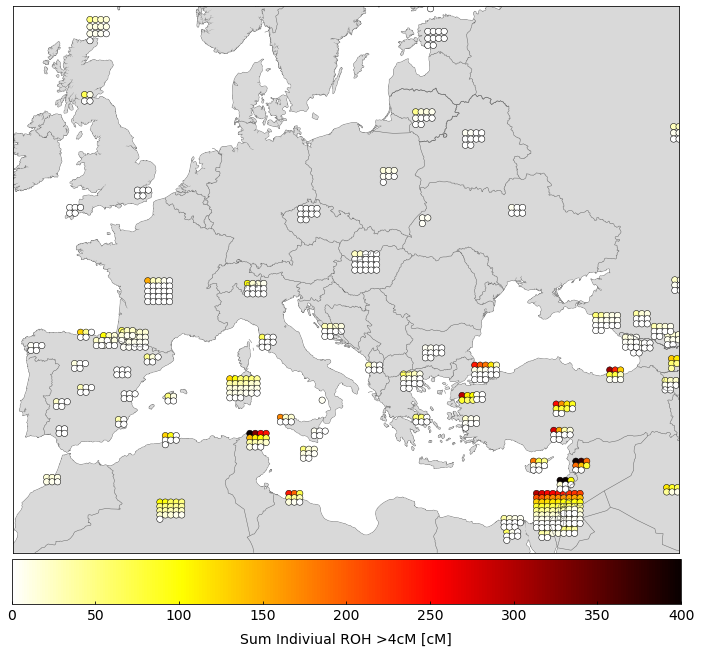

In [315]:
#df_plot = prepare_coordinates_df(df_roh, ofst_lat=0.3, ofst_lon=0.45)
plot_continent(df_plot, crs=[29, 60, -10, 45])

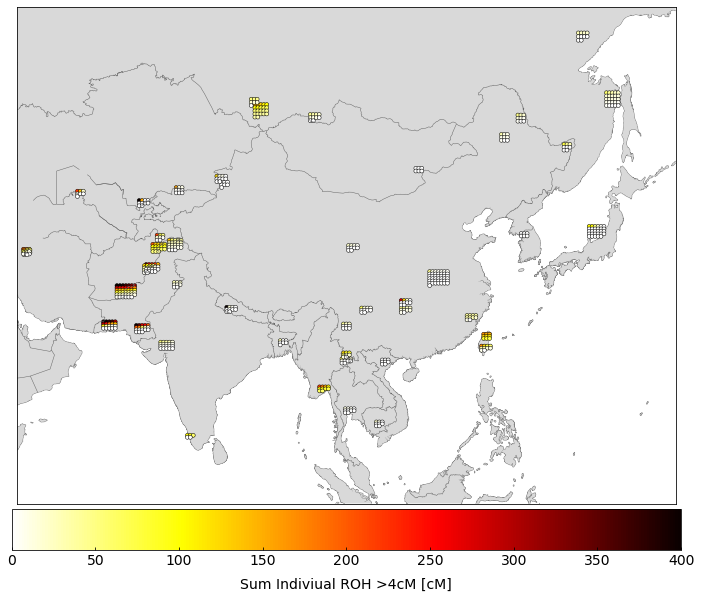

In [339]:
### Do the same for Asia
plot_continent(df_plot, crs=[0, 60, 50, 150], s=15, figsize=(12,10))

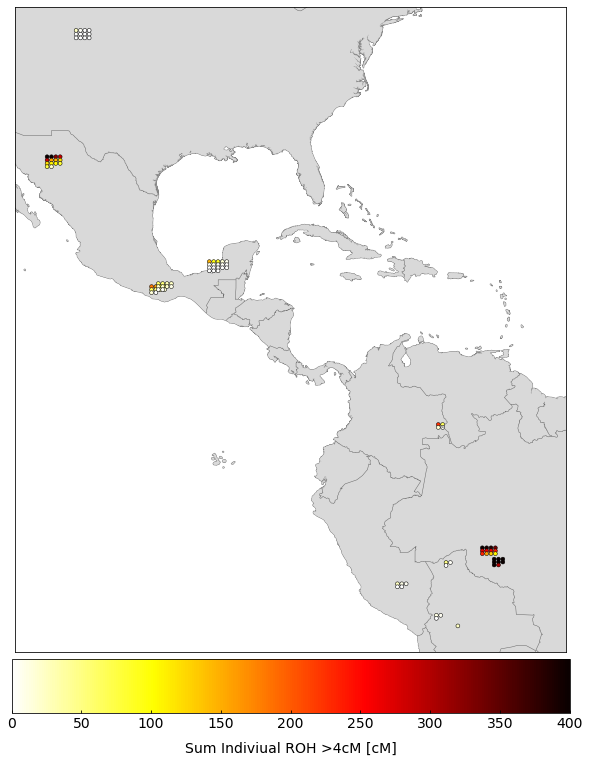

In [362]:
plot_continent(df_plot, crs=[-20, 42, 248, 305], s=15, figsize=(10,13), states=False)

# Plot ROH from Reich Sample (ancients)
Need Plotting functino and Imports from above

In [38]:
### First load the Data
df1 = pd.read_csv("./Empirical/Eigenstrat/Reichall/combined_roh05.csv", '\t')
print(f"Loaded {len(df1)} Individuals")

Loaded 1098 Individuals


In [39]:
### Then apply some filters
age_cutoff=15000

df1 = df1[~np.isnan(df1["lat"])]
df1 = df1[~np.isnan(df1["lon"])]
print(f"Filtered to {len(df1)} Individuals with existing Lat/Lon values")
df1 = df1[df1["age"]<age_cutoff]
print(f"Filtered to {len(df1)} Individuals with Age < {age_cutoff}")
#df_plot = prepare_coordinates_df(df1, ofst_lat=0.3, ofst_lon=0.45)

Filtered to 988 Individuals with existing Lat/Lon values
Filtered to 966 Individuals with Age < 15000


In [40]:
df_plot = prepare_coordinates_df(df1, ofst_lat=0.8, ofst_lon=1.0)  # Spacing adequate for South America

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


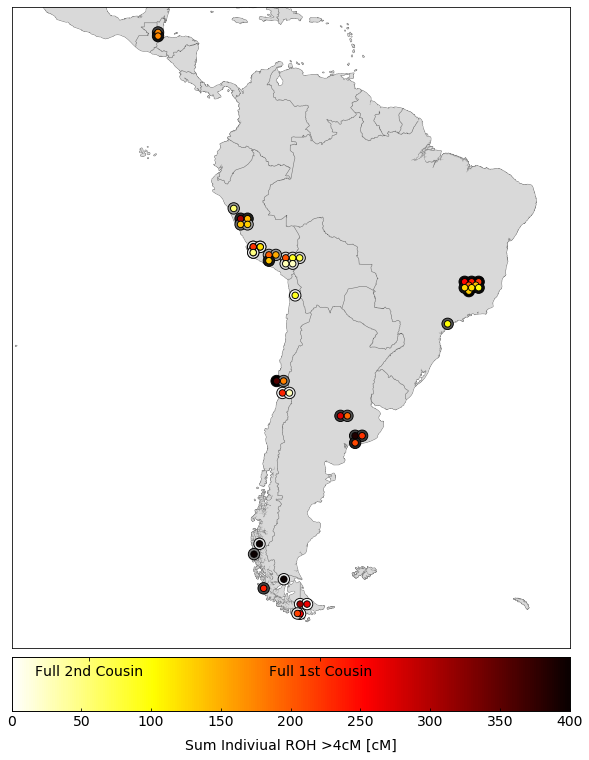

In [46]:
plot_continent(df_plot, crs=[-58, 20, -110, -30], s=42, figsize=(10,13), states=False,
               annotate=False, fs_labels=8, ew=0.9, y_off=1e5, vrange_a=[0,10000])

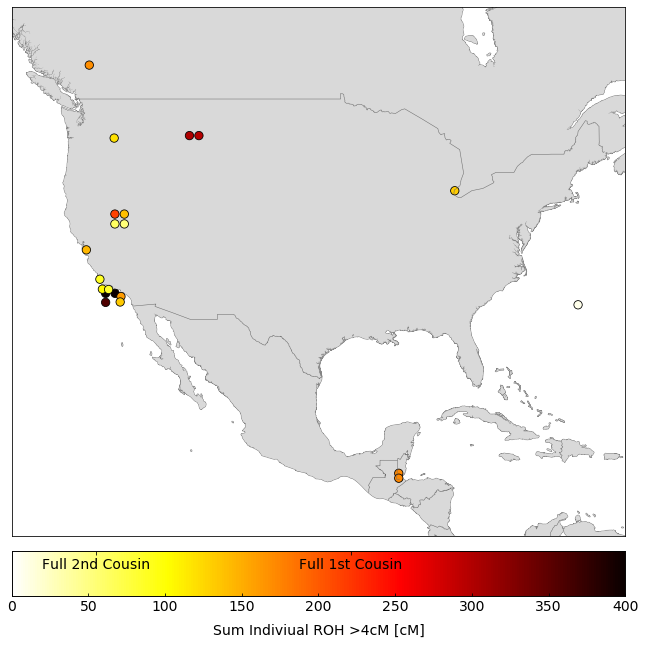

In [6]:
plot_continent(df_plot, crs=[10, 55, -130, -65], s=70, figsize=(11,11), states=False,
               annotate=False, fs_labels=8, ew=0.8)

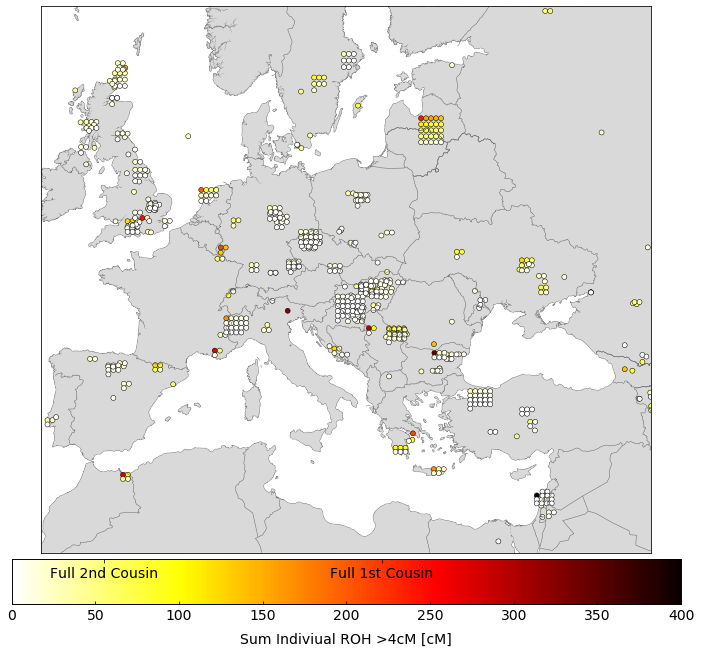

In [12]:
#df_plot = prepare_coordinates_df(df1, ofst_lat=0.3, ofst_lon=0.45)
plot_continent(df_plot, crs=[29, 62, -10, 45], s=25)
#plot_continent(df_plot, crs=[30, 40, 30, 40], s=30)

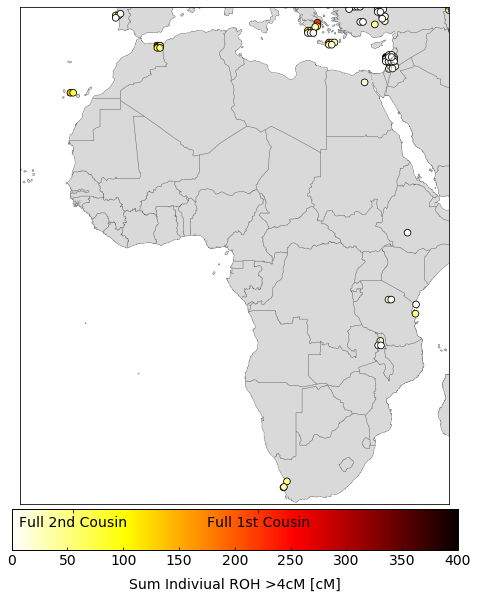

In [25]:
plot_continent(df_plot, crs=[-35, 40, -25, 45], s=45, figsize=(8,10), ew=0.8)

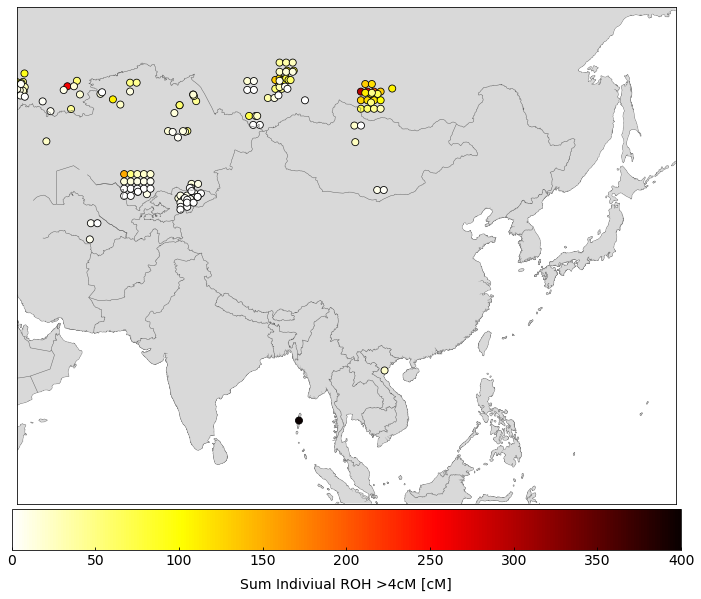

In [23]:
plot_continent(df_plot, crs=[0, 60, 50, 150], s=50, figsize=(12,10),
               annotate=False, fs_labels=14, ew=0.8)

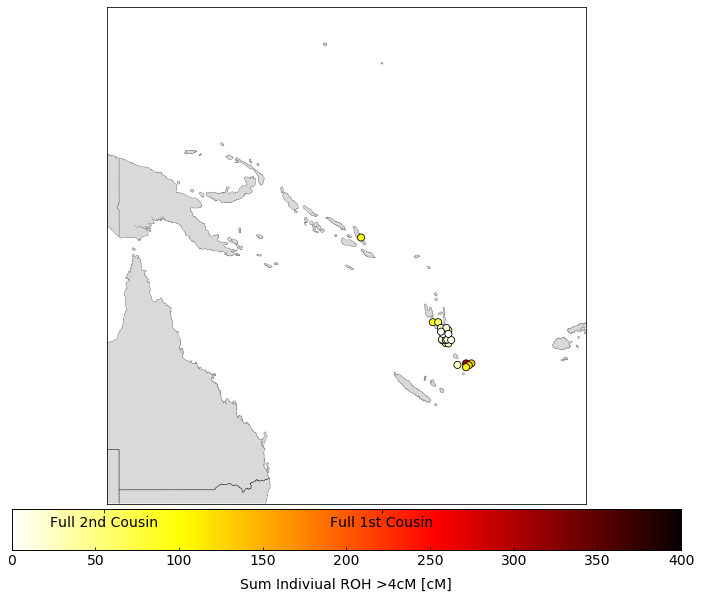

In [8]:
plot_continent(df_plot, crs=[-30, 10, 140, 180], s=50, figsize=(12,10),
               annotate=False, fs_labels=14, ew=0.8)

## Plot Subregion and Subtime

In [10]:
def extract_df_geo(df, lat0,lat1,lon0,lon1):
    """Extract Dataframe df from Sub Data frame based on coordinates
    lat0,lat1: Min and Max Lat. Equ. for lon0,lon1"""
    lat_okay = (df["lat"]>lat0) & (df["lat"]<lat1)
    lon_okay = (df["lon"]>lon0) & (df["lon"]<lon1)
    df_s = df[lat_okay & lon_okay]
    return df_s

def extract_df_age(df, age0, age1):
    """Extract Dataframe based on age.
    df: Input Dataframe; age0 and age1 min and max age"""
    age_okay = (df["age"]>=age0) & (df["age"]<=age1)
    df = df[age_okay]
    return df

### European HGs:

In [11]:
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_old = extract_df_age(df_euro, 7000, 25000)

In [12]:
substrings = ["HG", "Mesolithic", "Villabruna", "ElMiron", "Bichon", "Loschbour_published"]
hg = df_euro_old["clst"].str.contains('|'.join(substrings))
df_hg = df_euro_old[hg]
#df_hg.sort_values(by="age")[:50]
len(df_hg)

76

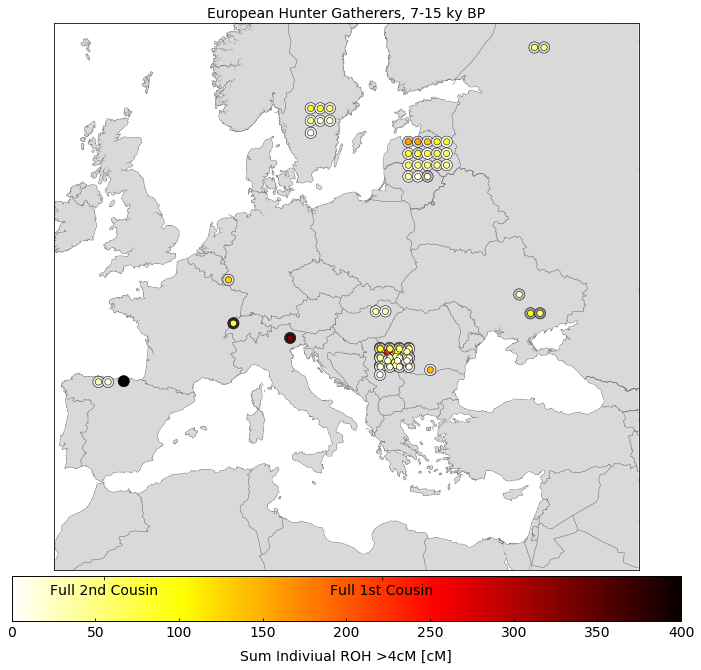

In [35]:
#df_plot = prepare_coordinates_df(df_hg, ofst_lat=0.6, ofst_lon=0.9)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=40, title="European Hunter Gatherers, 7-15 ky BP", age=True)

### Early European Farmers (7ky - 12ky BP)

In [36]:
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_old = extract_df_age(df_euro, 6000, 9000)

substrings = ["N", "farmer"]
neo = df_euro_old["clst"].str.contains('|'.join(substrings))
df_neo = df_euro_old[neo]
len(df_neo)

121

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


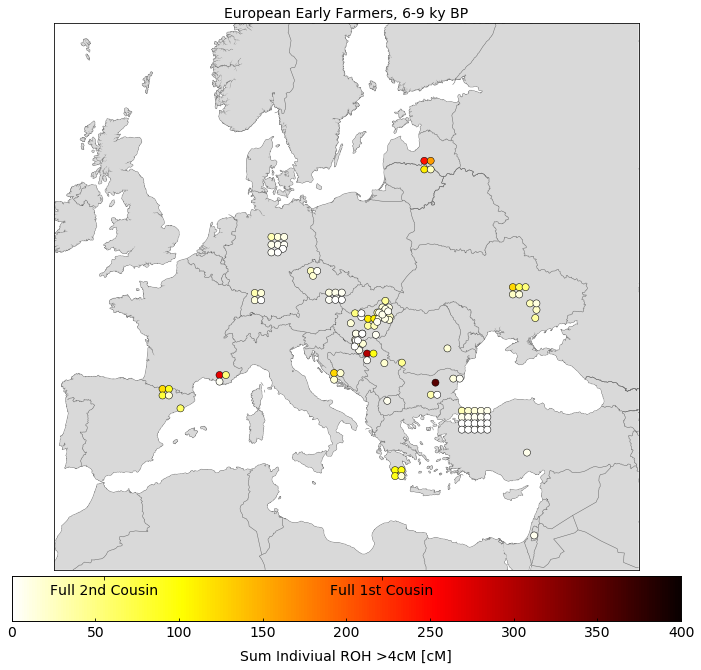

In [37]:
df_plot = prepare_coordinates_df(df_neo, ofst_lat=0.45, ofst_lon=0.6)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=50, title="European Early Farmers, 6-9 ky BP")

### European Bronze Age

In [151]:
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_young = extract_df_age(df_euro, 2800, 6000)

substrings = ["BA", "Beaker", "Mycenaean", "Minoan"]
ba = df_euro_young["clst"].str.contains('|'.join(substrings))

349

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


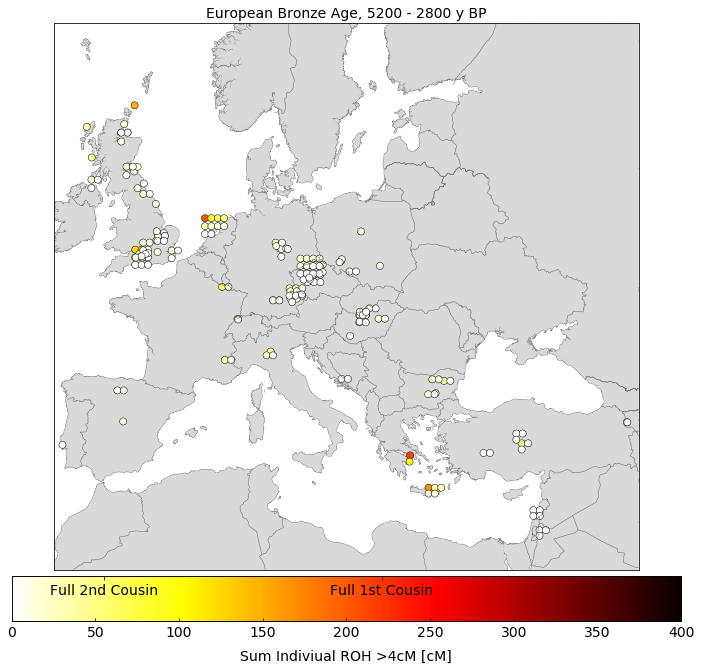

In [164]:
df_plot = prepare_coordinates_df(df_euro_young[ba], ofst_lat=0.45, ofst_lon=0.6)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=50, title="European Bronze Age, 5200 - 2800 y BP")

### European Recent

In [148]:
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_young = extract_df_age(df_euro, 0, 2800)
len(df_euro_young)

99

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


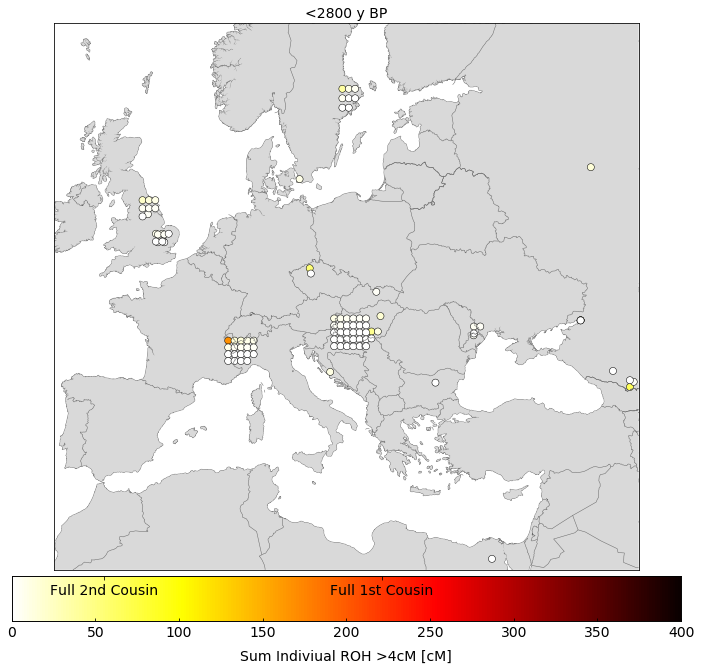

In [150]:
df_plot = prepare_coordinates_df(df_euro_young, ofst_lat=0.45, ofst_lon=0.6)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=50, title="<2800 y BP")

### Plot Yamnaya, Corded Ware

In [179]:
#substrings = ["BA", "Beaker", "Mycenaean", "Minoan"]
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_young = extract_df_age(df_euro, 2800, 7000)
#substrings = ["Corded_Ware", "CW", "Yamn", "Steppe"]
substrings = ["Beaker"]
cw = df_euro_young["clst"].str.contains('|'.join(substrings))

/software/python-3.7.0-el7-x86_64/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


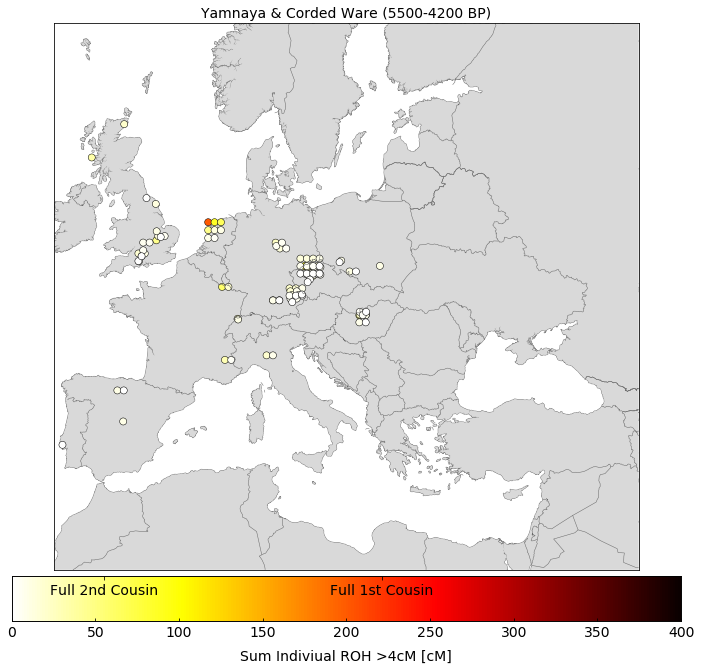

In [180]:
df_plot = prepare_coordinates_df(df_euro_young[cw], ofst_lat=0.45, ofst_lon=0.6)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=50, title="Yamnaya & Corded Ware (5500-4200 BP)")

# Area 51
Test Code here 

In [172]:
#substrings = ["BA", "Beaker", "Mycenaean", "Minoan"]
df_euro = extract_df_geo(df1, 29, 62, -10, 45)
df_euro_young = extract_df_age(df_euro, 2800, 7000)
substrings = ["Corded_Ware", "CW", "Yamn", "Steppe"]
cw = df_euro_young["clst"].str.contains('|'.join(substrings))

In [173]:
df_euro_young[ba].sort_values(by="age")

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
425,I7280,6.662906,21.669398,4,50.190000,14.158000,4200.0,OlaldeNature2018,Czech_Corded_Ware,3.362758,780479,1
405,I7279,9.432599,23.729900,3,50.190000,14.158000,4200.0,OlaldeNature2018,Czech_Corded_Ware,1.095572,636343,1
861,I1532,4.017103,4.017103,1,51.420000,11.680000,4225.0,MathiesonNature2015,Germany_Corded_Ware,0.566000,464060,1
576,I0049,4.737210,12.791812,3,51.420000,11.680000,4287.0,MathiesonNature2015 (1240k of same same sample...,Germany_Corded_Ware,0.649000,514322,1
419,I0104,6.383401,22.040411,4,51.420000,11.680000,4378.0,MathiesonNature2015 (1240k of same same sample...,Germany_Corded_Ware,4.184000,962767,1
412,N44.SG,7.037300,23.012692,4,52.620000,18.960000,4405.0,FernandesScientificReports2018,Poland_CWC_o.SG,2.185667,1017645,1
922,N49.SG,0.000000,0.000000,0,52.620000,18.960000,4405.0,FernandesScientificReports2018,Poland_CWC.SG,2.224865,1045306,1
459,N45.SG,6.720590,19.089388,4,52.620000,18.960000,4405.0,FernandesScientificReports2018,Poland_CWC.SG,2.472478,1050046,1
789,N47.SG,4.617099,4.617099,1,52.620000,18.960000,4405.0,FernandesScientificReports2018,Poland_CWC_o.SG,2.429959,1074445,1
451,MA826.RISE00.SG,6.362998,19.379504,4,59.408000,27.026000,4413.0,SaagCurrentBiology2017.merge.with.AllentoftNat...,Estonia_Corded_Ware.SG,0.799000,626916,1


In [ ]:
df_plot = prepare_coordinates_df(df_euro_young, ofst_lat=0.45, ofst_lon=0.6)
plot_continent(df_plot, crs=[29, 63, -10, 45], s=50, title="<2800 y BP")

In [134]:
#df_hg.sort_values(by="age")[:50]
df_neo.sort_values(by="age")[:]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
76,I4435,25.343204,160.237615,17,56.283300,25.133300,6003.0,MathiesonNature2018,Latvia_MN,3.407000,729122,1
42,I4627,38.998098,245.086993,27,56.283300,25.133300,6064.0,MathiesonNature2018,Latvia_MN,1.770000,686273,1
388,I4436,10.644710,26.060510,3,56.283300,25.133300,6105.0,MathiesonNature2018,Latvia_MN,3.029000,751632,1
123,I4437,18.231198,111.219116,16,56.283300,25.133300,6148.0,MathiesonNature2018,Latvia_MN,3.600000,732248,1
383,I4893,16.081202,26.257306,3,50.121747,14.456951,6349.0,OlaldeNature2018,Czech_N,5.311000,836569,1
126,I1495,33.298600,110.765296,8,47.167000,19.833000,6374.0,MathiesonNature2015 (capture of same sample sh...,Hungary_Lengyel_LN,4.853000,829966,1
121,NE7.SG,24.709200,113.546918,11,47.167000,19.833000,6374.0,GambaNatureCommunications2014,Hungary_MN.SG,0.998000,749149,1
785,I4894,4.647300,4.647300,1,50.121747,14.456951,6378.0,OlaldeNature2018,Czech_N,4.046000,816890,1
469,I7197,18.570596,18.570596,1,50.050415,14.366727,6450.0,OlaldeNature2018,Czech_MN,2.767748,738450,0
28,I1131,39.993691,299.807293,21,44.900000,19.750000,6483.0,MathiesonNature2018,Serbia_EN,2.922000,776289,1


In [16]:
df_sa = extract_df_geo(df1, -90, 90, -150, -30)
df_sa = extract_df_age(df_sa, 0, 1000)

In [17]:
df_sa["study"].value_counts()

PosthNakatsukaCell2018    7
RaghavanScience2015       3
ScheibScience2018         3
MorenoMayarScience2018    2
delaFuentePNAS2018        1
Name: study, dtype: int64

In [8]:
#df_sa.to_csv("./Diverse/list_anc_am.csv", sep="\t")
len(df_sa)

69

In [23]:
df_sa[df_sa["study"]=="delaFuentePNAS2018"]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
12,IPK13a.SG,31.267608,539.690993,67,-49.139722,-74.451944,1193.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,3.5,1044915,1
14,IPK12.SG,30.227202,501.053778,58,-52.350000,-70.966667,863.0,delaFuentePNAS2018,Chile_Kaweskar_1000BP.SG,7.8,1142798,1
41,IPY08b.SG,12.946699,309.061452,54,-55.250000,-69.016667,1000.0,delaFuentePNAS2018,Chile_Yamana_1000BP.SG,1.7,903809,1


In [5]:
df1[df1["study"]=="RaghavanScience2015"]

,iid,max_roh,sum_roh,n_roh,lat,lon,age,study,clst,mean_cov,n_cov_snp,include_alt
24,MA577.SG,35.410404,392.416215,49,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,2.078,925364,1
26,Yaghan895.SG,22.256702,376.446527,60,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,1.446,658876,1
27,Yaghan894.SG,25.148904,373.892782,54,-54.875556,-68.136389,100.0,RaghavanScience2015,Argentina_Fuego_Patagonian.SG,1.137,618185,1


In [17]:
df_hc = df_meta[df_meta["mean_cov"]>7]
df_hc

,iid,label,lat,lon,x_contam,mt_contam,age,study,clst_alt,period_alt,include_alt,clst,mean_cov,med_cov,n_cov_snp_read,full_iid,n_cov_snp
176,I2509,Balkans_Chalcolithic,43.160890,25.883410,NaN,NaN,6353.0,Mathieson et al. 2018,Balkans,ChL,1,Balkans-MNCA,7.557424,3.0,847804.0,I2509,847804
814,I0018,LBK_EN,48.780000,9.180000,NaN,NaN,7143.0,Lipson et al. 2017,LBK,EN,1,CE-EN,8.051218,3.0,908992.0,I0018,908992
908,I0054,Europe_EN,51.660000,11.530000,NaN,NaN,7072.0,Lazaridis et al. 2016,Europe,EN,1,CE-EN,15.708981,7.0,995026.0,I0054,995026
926,I0585,WHG,42.911000,-5.377800,NaN,NaN,7815.0,Lazaridis et al. 2016,WHG,HG,1,WHG-HG,15.359844,5.0,992582.0,I0585,992582
948,I0232,Steppe_MLBA,48.100000,54.440000,NaN,NaN,3475.0,Lazaridis et al. 2016,Steppe,MLBA,1,Steppe-MLBA,7.615660,7.0,1076013.0,I0232,1076013
959,I0707,Anatolia_N,40.300000,29.566667,NaN,NaN,8300.0,Lazaridis et al. 2016,Anatolia,N,1,Anatolia-N,8.274645,4.0,975559.0,I0707,975559
960,I0709,Anatolia_N,40.300000,29.566667,NaN,NaN,8300.0,Lazaridis et al. 2016,Anatolia,N,1,Anatolia-N,8.476118,4.0,954427.0,I0709,954427
983,I0581,Iberia_CA,42.333333,-3.500000,NaN,NaN,4739.5,Lipson et al. 2017,Iberia,CA,1,Iberia-LCA,9.410948,5.0,993338.0,I0581,993338
985,I0172,Europe_MNChL,51.420000,11.680000,NaN,NaN,5173.0,Lazaridis et al. 2016,Europe,MNChL,1,CE-MNCA,20.644154,11.0,1086738.0,I0172,1086738
989,I0408,Europe_MNChL,41.252200,-2.326220,NaN,NaN,5700.0,Lazaridis et al. 2016,Europe,MNChL,1,Iberia-ECA,11.393325,5.0,921418.0,I0408,921418
